In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from datetime import datetime,date
import yfinance as yf

In [ ]:
import yfinance as yf
from datetime import date, timedelta
today = date.today()
today
end_date = today.strftime("%Y-%m-%d")
end_date
d1 = date.today() - timedelta(days=360*5) #for last 5 years
d1
start_date = d1.strftime("%Y-%m-%d")
start_date
data = yf.download(tickers = "AAPL",
                  start = start_date,
                  end = end_date)
data.shape

[*********************100%%**********************]  1 of 1 completed


(1241, 6)

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-06,42.939999,43.695000,42.605000,43.680000,41.979774,172393600
2018-12-07,43.372501,43.622501,42.075001,42.122501,40.482899,169126400
2018-12-10,41.250000,42.522499,40.832500,42.400002,40.749592,248104000
2018-12-11,42.915001,42.947498,41.750000,42.157501,40.516533,189126800
2018-12-12,42.599998,42.980000,42.255001,42.275002,40.629456,142510800
...,...,...,...,...,...,...
2023-11-03,174.240005,176.820007,173.350006,176.649994,176.649994,79763700
2023-11-06,176.380005,179.429993,176.210007,179.229996,179.229996,63841300
2023-11-07,179.179993,182.440002,178.970001,181.820007,181.820007,70530000


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-03,174.240005,176.820007,173.350006,176.649994,176.649994,79763700
2023-11-06,176.380005,179.429993,176.210007,179.229996,179.229996,63841300
2023-11-07,179.179993,182.440002,178.970001,181.820007,181.820007,70530000
2023-11-08,182.350006,183.449997,181.589996,182.889999,182.889999,49340300
2023-11-09,182.960007,184.119995,181.809998,182.410004,182.410004,53673900


In [ ]:
data = data.reset_index()

In [ ]:
data = data.drop(["Date", "Adj Close"], axis = 1)

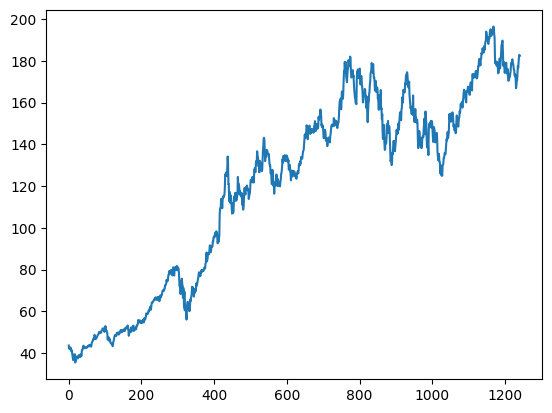

In [ ]:
plt.plot(data.Close)

In [ ]:
#100days moving average
ma100 = data.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1236    181.677801
1237    181.630601
1238    181.588701
1239    181.568401
1240    181.542401
Name: Close, Length: 1241, dtype: float64

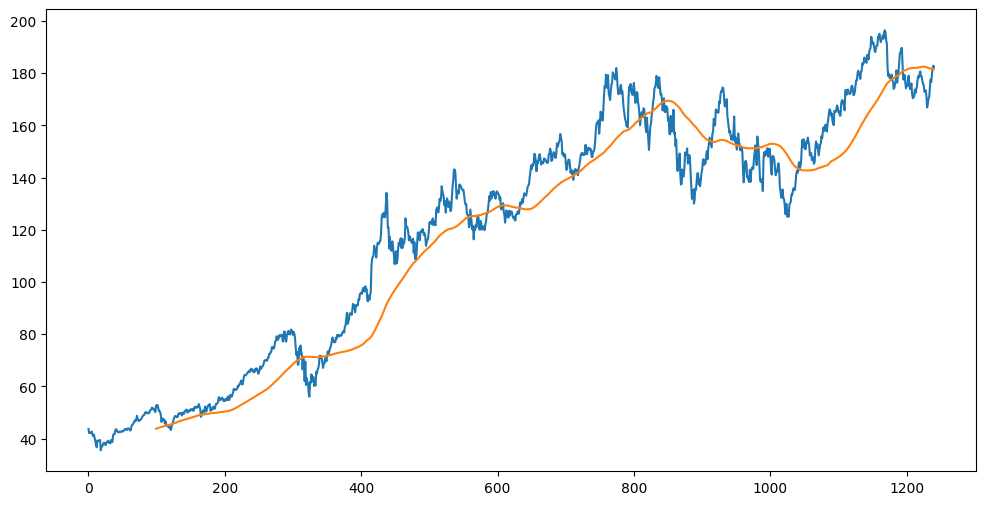

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(data.Close)
plt.plot(ma100)

In [ ]:
#200 days moving average
m200 = data.Close.rolling(200).mean()
m200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1236    171.50385
1237    171.71065
1238    171.91420
1239    172.11600
1240    172.31875
Name: Close, Length: 1241, dtype: float64

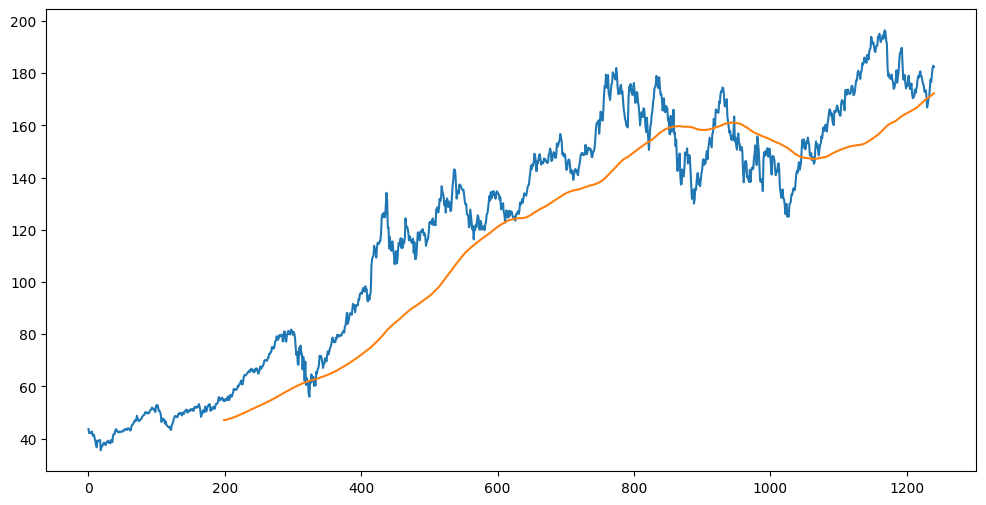

In [ ]:
plt.figure(figsize =(12,6))
plt.plot(data.Close)
plt.plot(m200)

In [ ]:
#Splitting the data into train and test

In [ ]:
data_training = pd.DataFrame(data["Close"][0:int(len(data)*0.7)])

data_testing = pd.DataFrame(data["Close"][int(len(data)*0.7):int(len(data))])

In [ ]:
data.shape

(1241, 5)

In [ ]:
print(data_training.shape) #70%training data

(868, 1)


In [ ]:
print(data_testing.shape)#30% testing data

(373, 1)


In [ ]:
data_training.head()

,Close
0,43.680000
1,42.122501
2,42.400002
3,42.157501
4,42.275002


In [ ]:
data_testing.head()

,Close
868,140.820007
869,137.350006
870,137.589996
871,143.110001
872,140.360001


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)

In [ ]:
data_training_array

array([[0.05552616],
       [0.04489204],
       [0.04678673],
       [0.04513101],
       [0.04593327],
       [0.04909106],
       [0.03975419],
       [0.03712555],
       [0.0407613 ],
       [0.03191943],
       [0.02498933],
       [0.0145771 ],
       [0.00792012],
       [0.02556968],
       [0.02382861],
       [0.02396517],
       [0.02654264],
       [0.02684987],
       [0.        ],
       [0.010361  ],
       [0.00979771],
       [0.01461125],
       [0.01898096],
       [0.01981736],
       [0.01723989],
       [0.01333105],
       [0.01857132],
       [0.02176325],
       [0.02333362],
       [0.02497227],
       [0.0189639 ],
       [0.02002218],
       [0.01793974],
       [0.02657676],
       [0.02408467],
       [0.02131943],
       [0.03936161],
       [0.04139285],
       [0.04152941],
       [0.04960314],
       [0.05460441],
       [0.05470684],
       [0.049074  ],
       [0.04816933],
       [0.04649653],
       [0.04898865],
       [0.04777672],
       [0.048

In [ ]:
X_train = []
Y_train = []

for i in range(100, data_training_array.shape[0]):
  X_train.append(data_training_array[i-100])
  Y_train.append(data_training_array[i,0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = "relu", return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = "relu", return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units = 80, activation = "relu", return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             10400     
                                                                 
 dropout (Dropout)           (None, 1, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 60)             26640     
                                                                 
 dropout_1 (Dropout)         (None, 1, 60)             0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 80)             45120     
                                                                 
 dropout_2 (Dropout)         (None, 1, 80)             0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer = "adam", loss = "mean_squared_error")
model.fit(X_train, Y_train, epochs = 50)

Epoch 1/50
24/24 [==============================] - 5s 11ms/step - loss: 0.2994
Epoch 2/50
24/24 [==============================] - 0s 10ms/step - loss: 0.1802
Epoch 3/50
24/24 [==============================] - 0s 11ms/step - loss: 0.0741
Epoch 4/50
24/24 [==============================] - 0s 10ms/step - loss: 0.0588
Epoch 5/50
24/24 [==============================] - 0s 9ms/step - loss: 0.0447
Epoch 6/50
24/24 [==============================] - 0s 9ms/step - loss: 0.0348
Epoch 7/50
24/24 [==============================] - 0s 7ms/step - loss: 0.0268
Epoch 8/50
24/24 [==============================] - 0s 6ms/step - loss: 0.0287
Epoch 9/50
24/24 [==============================] - 0s 6ms/step - loss: 0.0261
Epoch 10/50
24/24 [==============================] - 0s 6ms/step - loss: 0.0236
Epoch 11/50
24/24 [==============================] - 0s 6ms/step - loss: 0.0245
Epoch 12/50
24/24 [==============================] - 0s 5ms/step - loss: 0.0245
Epoch 13/50
24/24 [==========================

In [ ]:
model.save("keras_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
data_testing.head()

,Close
868,140.820007
869,137.350006
870,137.589996
871,143.110001
872,140.360001


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing,ignore_index = True)

<ipython-input-52-a9bd0640087b>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing,ignore_index = True)


In [ ]:
final_df.head()

,Close
0,176.279999
1,180.330002
2,179.289993
3,179.380005
4,178.199997


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[7.17625674e-01],
       [7.74324583e-01],
       [7.59764754e-01],
       [7.61024892e-01],
       [7.44505111e-01],
       [7.35685433e-01],
       [7.97844010e-01],
       [7.65504691e-01],
       [6.98586047e-01],
       [6.57706890e-01],
       [6.60086817e-01],
       [6.60366871e-01],
       [7.00826053e-01],
       [7.07125884e-01],
       [6.60366871e-01],
       [6.72686693e-01],
       [6.26907549e-01],
       [5.76928446e-01],
       [5.52848911e-01],
       [5.23449627e-01],
       [5.12389729e-01],
       [4.86630295e-01],
       [4.85370372e-01],
       [4.78790486e-01],
       [6.34327383e-01],
       [6.96626094e-01],
       [6.94246168e-01],
       [7.11465763e-01],
       [6.70306553e-01],
       [6.63166772e-01],
       [6.52947037e-01],
       [6.97326123e-01],
       [7.17625674e-01],
       [6.59386788e-01],
       [6.10667822e-01],
       [6.14027832e-01],
       [6.68766575e-01],
       [6.65406779e-01],
       [6.14027832e-01],
       [5.91908249e-01],


In [ ]:
input_data.shape

(473, 1)

In [ ]:
X_test = []
Y_test = []
for i in range(100, input_data.shape[0]):
  X_test.append(input_data[i-100])
  Y_test.append(input_data[i,0])

In [ ]:
X_test, Y_test = np.array(X_test), np.array(Y_test)

In [ ]:
print(X_test.shape)
print(Y_test.shape)

(373, 1)
(373,)


In [ ]:
y_predicted = model.predict(X_test)

12/12 [==============================] - 1s 3ms/step


In [ ]:
y_predicted.shape

(373, 1)

In [ ]:
scaler.scale_

array([0.01399972])

In [ ]:
scale_factor = 1/0.01548707
y_predicted = y_predicted * scale_factor
Y_test = Y_test * scale_factor

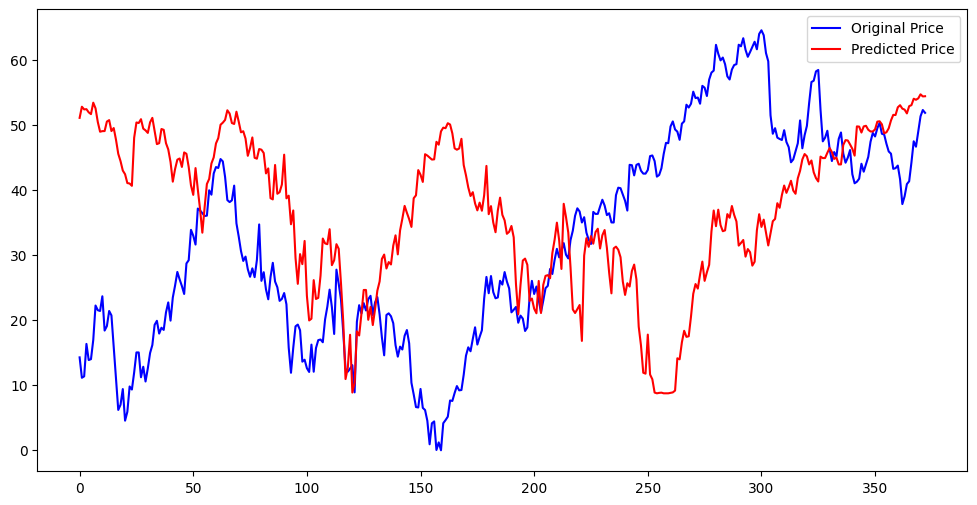

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(Y_test, "b", label = "Original Price")
plt.plot(y_predicted, "r", label = "Predicted Price")
plt.legend()
plt.show()